### 1. Implementing Feedforward neural networks with Keras and TensorFlow for 
classification of hand-written MNIST dataset using below steps:

In [11]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [12]:
mnist=keras.datasets.mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [13]:
abc=xtrain[0]
(img_len,img_width)=abc.shape
print("The image is ",img_len," x ",img_width)
xtrain=xtrain/255
xtest=xtest/255

The image is  28  x  28


In [14]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=11)

Epoch 1/11
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6608 - accuracy: 0.8314 - val_loss: 0.3570 - val_accuracy: 0.9035
Epoch 2/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3371 - accuracy: 0.9063 - val_loss: 0.2918 - val_accuracy: 0.9194
Epoch 3/11
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2873 - accuracy: 0.9190 - val_loss: 0.2601 - val_accuracy: 0.9255
Epoch 4/11
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2569 - accuracy: 0.9275 - val_loss: 0.2386 - val_accuracy: 0.9324
Epoch 5/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2342 - accuracy: 0.9339 - val_loss: 0.2200 - val_accuracy: 0.9380
Epoch 6/11
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2155 - accuracy: 0.9398 - val_loss: 0.2043 - val_accuracy: 0.9428
Epoch 7/11
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2002 - accuracy: 0.9443 - val_loss: 0.1921 - val_accuracy:

In [16]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print("Loss = %.3f"%test_loss)
print("Acc = %.3f"%test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1550 - accuracy: 0.9556
Loss = 0.155
Acc = 0.956


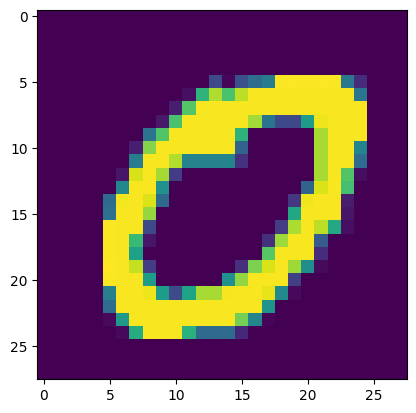

In [17]:
n=random.randint(0,9999)
plt.imshow(xtest[n])
plt.show()

In [18]:
predicted_value=model.predict(xtest)
import numpy as np
print("Target Value :",ytest[n])
print("Predicted Value :",np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 4ms/step
Target Value : 0
Predicted Value : 0


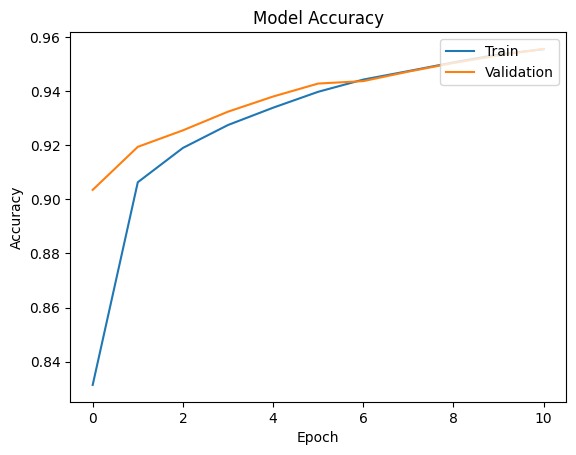

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train','Validation'],loc="upper right")
plt.show()

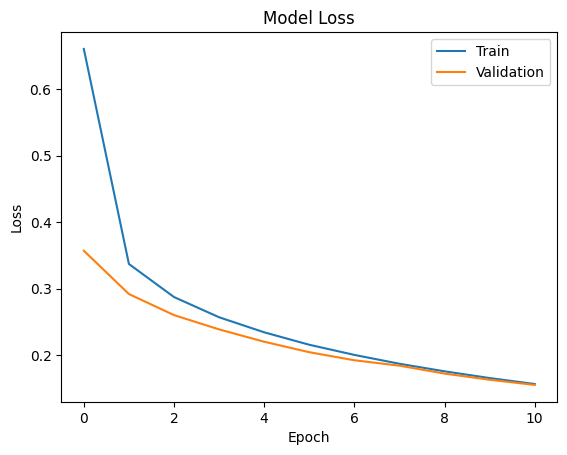

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train','Validation'],loc="upper right")
plt.show()